In [131]:
import matplotlib.patheffects as path_effects
from scipy.ndimage import gaussian_filter
import numpy as np
import pandas as pd

from mplsoccer import Sbopen, Pitch
import cmasher as cmr

from variables import player_iden, player_nn, cur_team, comp_name, player_number, player_matches

In [132]:
parser = Sbopen()

In [133]:
match_id = 3837876

In [134]:
events = pd.concat(parser.event(match_id))
team2 = list(set(events.team_name.unique()) - {cur_team})[0]

In [135]:
mask_pressure_player = events[(events['player_id'] == player_iden) & (events['type_name'] == 'Pressure')]
mask_pressure_team = events[(events['team_name'] == cur_team) & (events['type_name'] == 'Pressure')]
df_pressure_player = mask_pressure_player[['x', 'y']]
df_pressure_team = mask_pressure_team[['x', 'y']]

In [153]:
#colormap = cmr.ghostlight
colormap = 'hot'

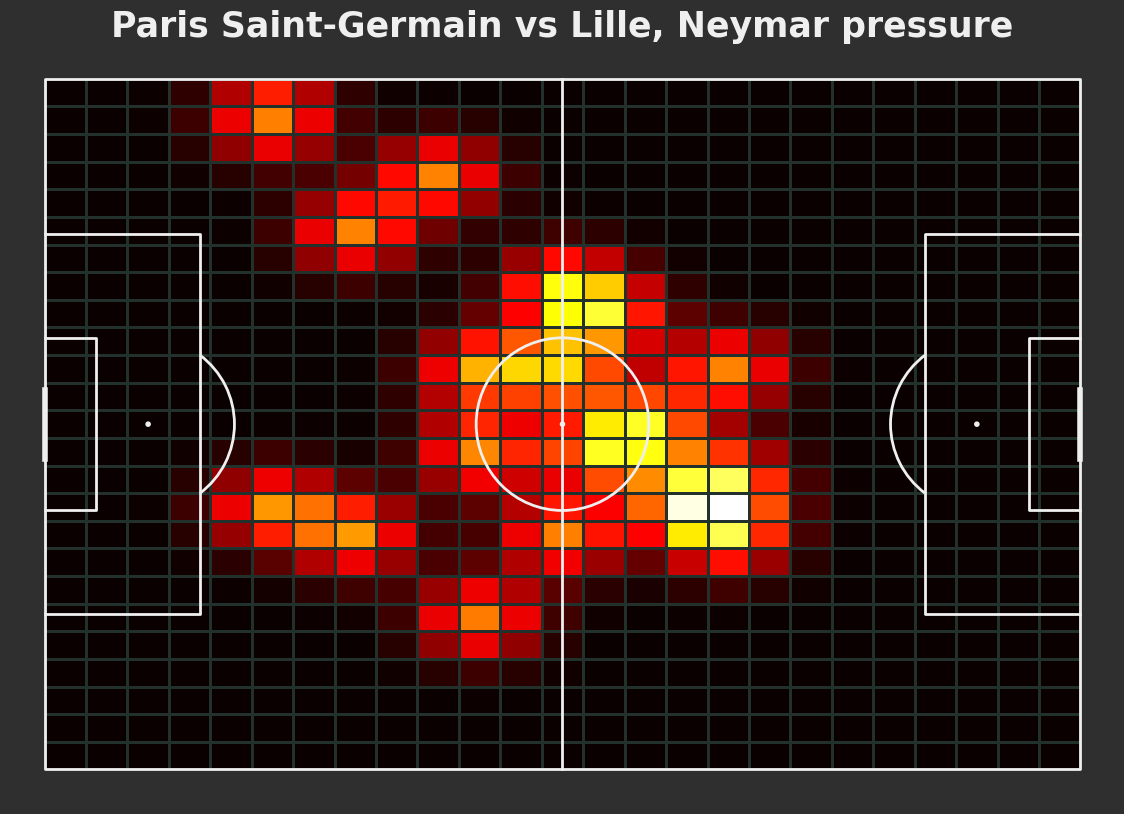

In [154]:
# setup pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#2F2F2F', line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(13.2, 8.25))
fig.set_facecolor('#2F2F2F')
bin_statistic = pitch.bin_statistic(df_pressure_player.x, df_pressure_player.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap=colormap, edgecolors='#22312b')

ax_title = ax.set_title(f'{cur_team} vs {team2}, {player_nn} pressure', fontsize=25, fontweight='bold', color='#efefef')

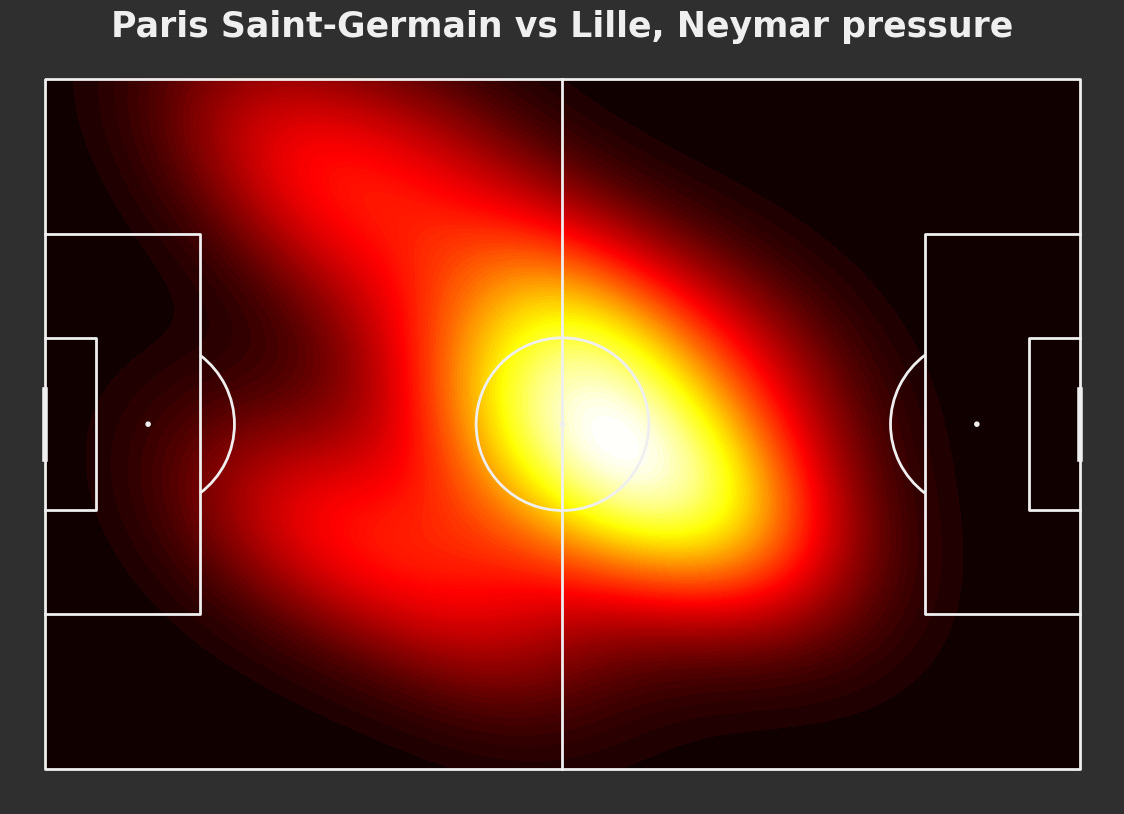

In [155]:
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#2F2F2F',
              line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(13.2, 8.25))
fig.set_facecolor('#2F2F2F')
kdeplot = pitch.kdeplot(df_pressure_player.x, df_pressure_player.y, ax=ax, cmap=colormap, fill=True, edgecolors='#22312b', levels=100, thresh=0, cut=4)
ax_title = ax.set_title(f'{cur_team} vs {team2}, {player_nn} pressure', fontsize=25, fontweight='bold', color='#efefef')

Text(0.5, 0.5, 'Pressure applied by\n Paris Saint-Germain')

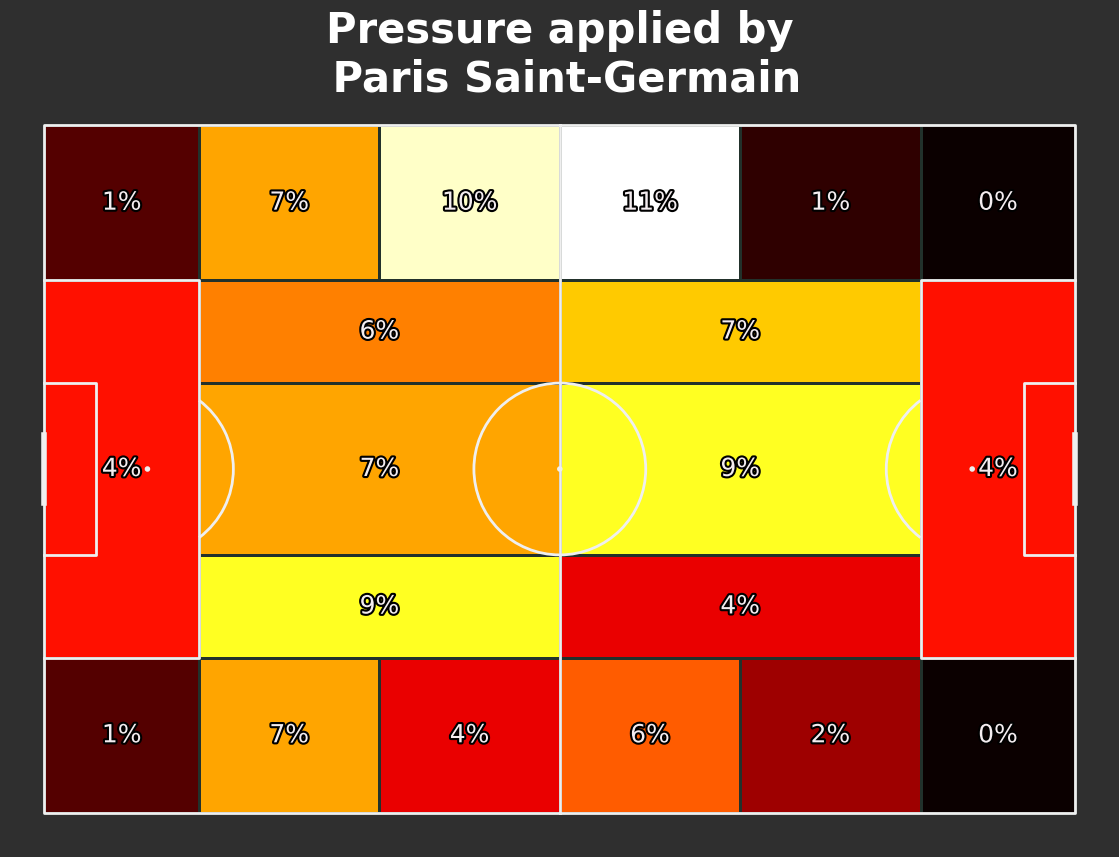

In [156]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#2F2F2F', line_color='#efefef')

fig, axs = pitch.grid(endnote_height=0.0, endnote_space=0,
                      title_height=0.08, title_space=0,
                      axis=False,
                      grid_height=0.84)
fig.set_facecolor('#2F2F2F')

# heatmap and labels
'''
with custom bins

bin_statistic = pitch.bin_statistic(df_pressure_team.x, df_pressure_team.y, statistic='count',
                                               bins=(8, 6), normalize=True)
pitch.heatmap(bin_statistic, ax=axs['pitch'],
                         cmap=colormap, edgecolors='#22312b')
'''

bin_statistic = pitch.bin_statistic_positional(df_pressure_team.x, df_pressure_team.y, statistic='count',
                                               positional='full', normalize=True)
pitch.heatmap_positional(bin_statistic, ax=axs['pitch'],
                         cmap=colormap, edgecolors='#22312b')

labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=axs['pitch'], ha='center', va='center',
                             str_format='{:.0%}', path_effects=path_eff)

axs['title'].text(0.5, 0.5, f"Pressure applied by\n {cur_team}", color='white', va='center', ha='center', fontsize=30, fontweight='bold')